# Study about Histogram, Normalize and Equalization

참고: https://bkshin.tistory.com/entry/OpenCV-10-%ED%9E%88%EC%8A%A4%ED%86%A0%EA%B7%B8%EB%9E%A8

In [7]:
import cv2
import matplotlib.pyplot as plt

In [8]:
# Reference: https://www.kaggle.com/jiahongqian/cephalometric-landmarks?select=test1_senior.csv
sample_image = 'img/cepha_sample.jpg'

(2400, 1935)


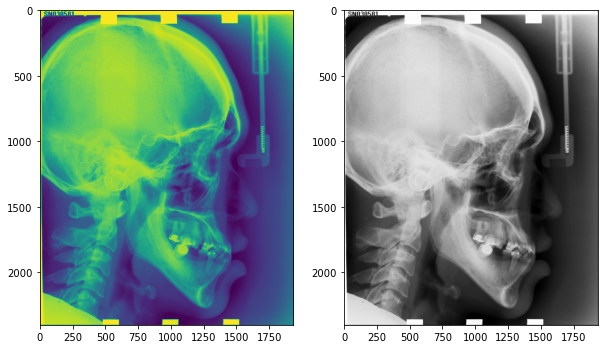

In [30]:
img = cv2.imread(sample_image, 0)
print(img.shape)

plt.figure(figsize=(10, 10))

plt.subplot(121)
plt.imshow(img)

plt.subplot(122)
plt.imshow(img, cmap='gray')
plt.show()

## Histogram

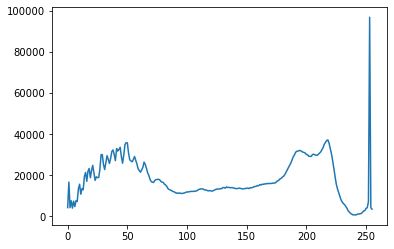

In [32]:
channel = [0]
mask = None
histSize = [256]
ranges = [0, 256]

hist = cv2.calcHist([img], channel, mask, histSize, ranges)
plt.plot(hist)
plt.show()

## Normalize

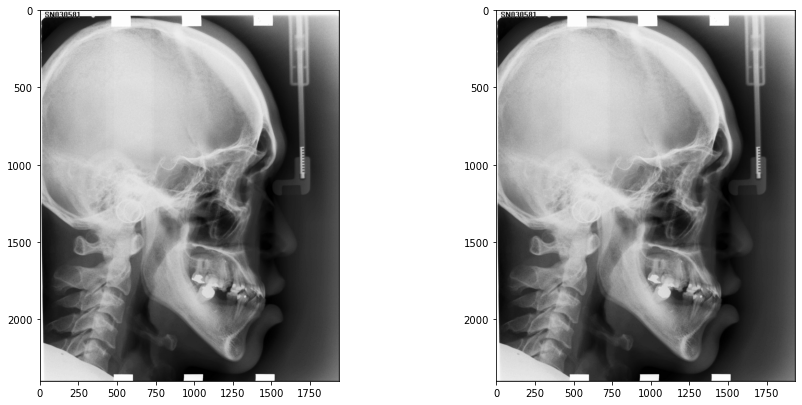

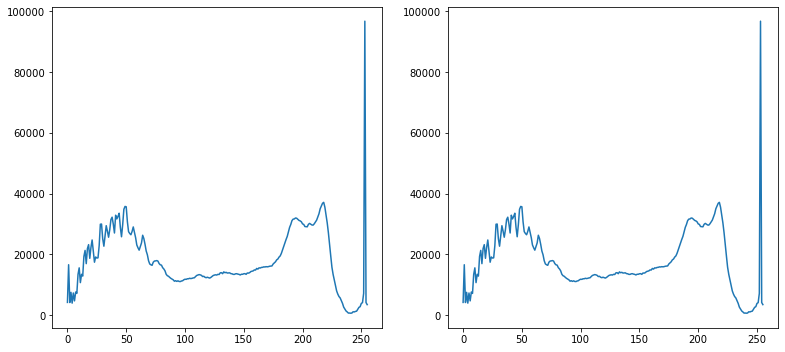

In [47]:
channel = [0]
mask = None
histSize = [256]
ranges = [0, 256]

img_norm = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)

hist_norm = cv2.calcHist([img_norm], channel, mask, histSize, ranges)

plt.figure(figsize=(15, 15))
# image
plt.subplot(221)
plt.imshow(img, cmap='gray')

plt.subplot(222)
plt.imshow(img_norm, cmap='gray')
plt.show()

plt.figure(figsize=(13, 13))
# histogram
plt.subplot(223)
plt.plot(hist)

plt.subplot(224)
plt.plot(hist_norm)
plt.show()

## Equalization


- 정규화는 분포가 한곳에 집중되어 있는 경우에는 효과적이지만 그 집중된 영역에서 멀리 떨어진 값이 있을 경우에는 효과가 없다.

- 평탄화는 각각의 값이 전체 분포에 차지하는 비중에 따라 분포를 재분배하므로 명암 대비를 개선하는 데 효과적이다.

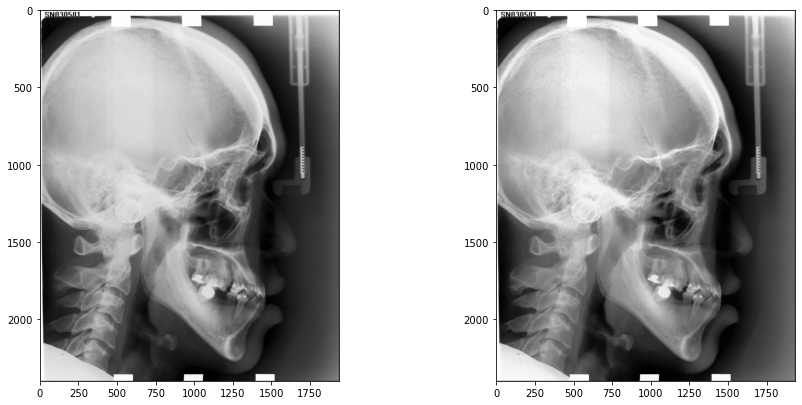

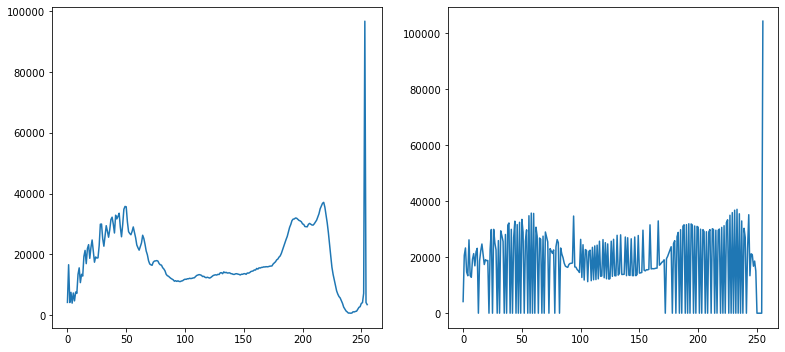

In [51]:
img_equa = cv2.equalizeHist(img)

hist_equa = cv2.calcHist([img_equa], channel, mask, histSize, ranges)

plt.figure(figsize=(15, 15))
# image
plt.subplot(221)
plt.imshow(img, cmap='gray')

plt.subplot(222)
plt.imshow(img_equa, cmap='gray')
plt.show()

plt.figure(figsize=(13, 13))
# histogram
plt.subplot(223)
plt.plot(hist)

plt.subplot(224)
plt.plot(hist_equa)
plt.show()

## CLAHE(Contrast Limited Adaptive Histogram Equalization)

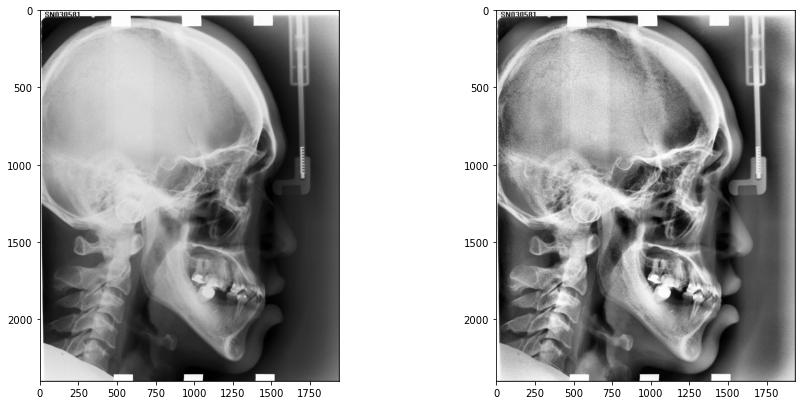

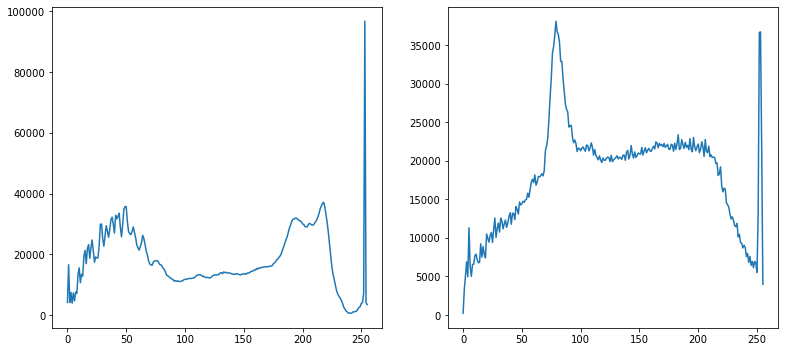

In [57]:
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
img_clahe = clahe.apply(img)

hist_clahe = cv2.calcHist([img_clahe], channel, mask, histSize, ranges)

plt.figure(figsize=(15, 15))
# image
plt.subplot(221)
plt.imshow(img, cmap='gray')

plt.subplot(222)
plt.imshow(img_clahe, cmap='gray')
plt.show()

plt.figure(figsize=(13, 13))
# histogram
plt.subplot(223)
plt.plot(hist)

plt.subplot(224)
plt.plot(hist_clahe)
plt.show()